## **i. Mount google drive**
---

In [116]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [117]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [118]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [119]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [120]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

## **Question a**
---
Read in the image 'symbols_texture.jpg' and display the image. Name the array as `imgcolor`.

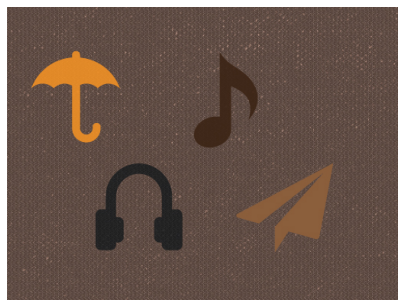

In [121]:
# Type your code below
import morphsnakes as ms

# Read in image, turn it into grayscale
imgcolor     = cv2.imread('symbols_texture.jpg')
cv2plt(imgcolor)

## **Question b**
---
Use morphsnakes to segment the objects in the image. Create the mask as shown in below output.

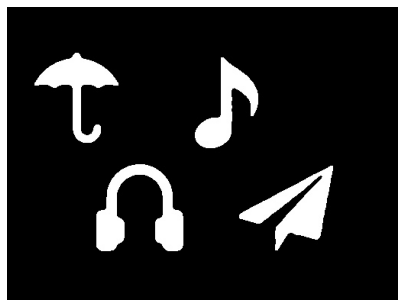

In [122]:
# Run the below to display the required output

cv2plt(cv2.imread('wks3_1_b.jpg'))

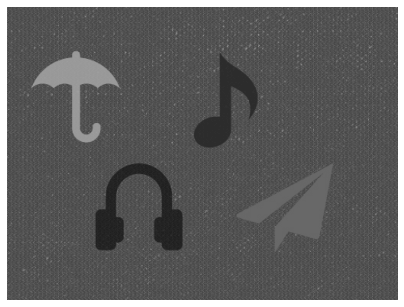

In [123]:
# My code

imgcolor     = cv2.cvtColor(imgcolor,cv2.COLOR_BGR2GRAY) / 255.0
cv2plt(imgcolor*255)

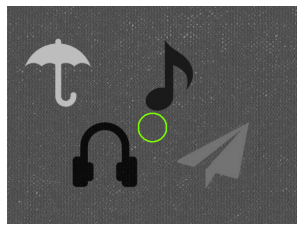

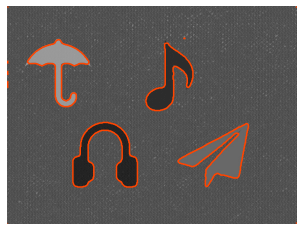

In [124]:
# Create inverse gaussian gradient
invg     = ms.inverse_gaussian_gradient(imgcolor, alpha=700, sigma=3)
    
# Create the initial level set, a circle
ls0      = ms.circle_level_set(imgcolor.shape, (imgcolor.shape[0]/1.8, imgcolor.shape[1]/2), 25)

# Create the callback for visual display
callback = ms.visual2d(imgcolor)

# Run the segmentation using geodesic active contour
lsf      = ms.morphological_geodesic_active_contour(invg, 
                                                    iterations=2000, 
                                                    init_level_set=ls0,
                                                    smoothing=1, 
                                                    threshold=0.5,
                                                    balloon=1, 
                                                    iter_callback=callback)

# image is a 2D array with values range from 0~1, so
# to plot it correctly, we need to specify the
# correct vmin and vmax
plt.imshow(imgcolor ,cmap='gray',vmin=0,vmax=1)


# Draw the contour on the segmentation output and
# superimpose the contour on the image
# [0.5] is the level of height in 'lsf' for the contour to draw upon
plt.contour(lsf, [0.5], colors='orangered')
plt.axis('off')
plt.show()

 The minimum value in lsf is 0
 The maximum value in lsf is 1



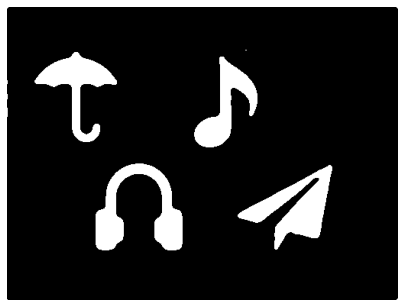

In [125]:
# Check the minimum and maximum value of the segmentation output 'lsf'
print(" The minimum value in lsf is", lsf.min())
print(" The maximum value in lsf is", lsf.max())
print("")

# Display the 'lsf' output
cv2plt((1-lsf)*255)